In [40]:
import os

from PIL import Image
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import ImageOps
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate

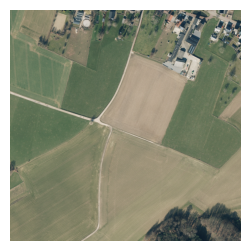

(1000, 1000, 3)

In [37]:
file_path = 'raw_data/OpenEarthMap_wo_xBD/aachen/images/aachen_1.tif'
fig = plt.figure(figsize=(3, 3))
X_Original = Image.open(file_path)
plt.axis('off')
plt.imshow(X_Original)
plt.show()
X_Original = np.array(X_Original)
X_Original.shape

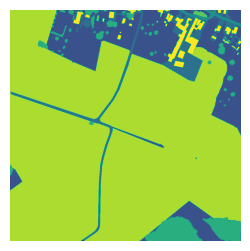

(1000, 1000)

In [41]:
file_path = 'raw_data/OpenEarthMap_wo_xBD/aachen/labels/aachen_1.tif'
fig = plt.figure(figsize=(3, 3))
y_original = Image.open(file_path)
plt.axis('off')
plt.imshow(y_original)
plt.show()
y_original = np.array(y_original)
y_original.shape

In [42]:
y_original_cat = to_categorical(y_original)
y_original_cat.shape

(1000, 1000, 9)

In [32]:
# # Rezise y_original to 256, 256 pixels

# # Define the desired new size
# new_size = (256, 256)

# # Define a list of resampling methods to compare
# resampling_methods = [
#     Image.NEAREST,
#     Image.BOX,
#     Image.BILINEAR,
#     Image.HAMMING,
#     Image.BICUBIC,
#     Image.LANCZOS,]

# # Create a list to store the resized images
# resized_images = []

# # Resize the image using each resampling method
# for method in resampling_methods:
#     resized_im = y_original.resize(new_size, method)
#     resized_images.append((method, resized_im))

# # Sort the resized images based on the resampling method
# resized_images.sort(key=lambda x: str(x[0]))

# # Create a figure to display the resized images
# num_methods = len(resampling_methods) + 1  # Add 1 for the original image
# num_rows = (num_methods + 1) // 2  # Calculate the number of rows needed
# fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))

# # Display the original image and resized images in ascending order
# axes[0, 0].imshow(y_original)
# axes[0, 0].axis('off')
# axes[0, 0].set_title("Original")

# for i, ax in enumerate(axes.flatten()[1:]):
#     method, resized_im = resized_images[i]
#     ax.imshow(resized_im)
#     ax.axis('off')
#     ax.set_title(f"Method: {method}")

# # Adjust the spacing between subplots
# plt.tight_layout()

# # Show the figure
# plt.show()

TypeError: 'tuple' object cannot be interpreted as an integer

TypeError: Invalid shape (1000, 1000, 8) for image data

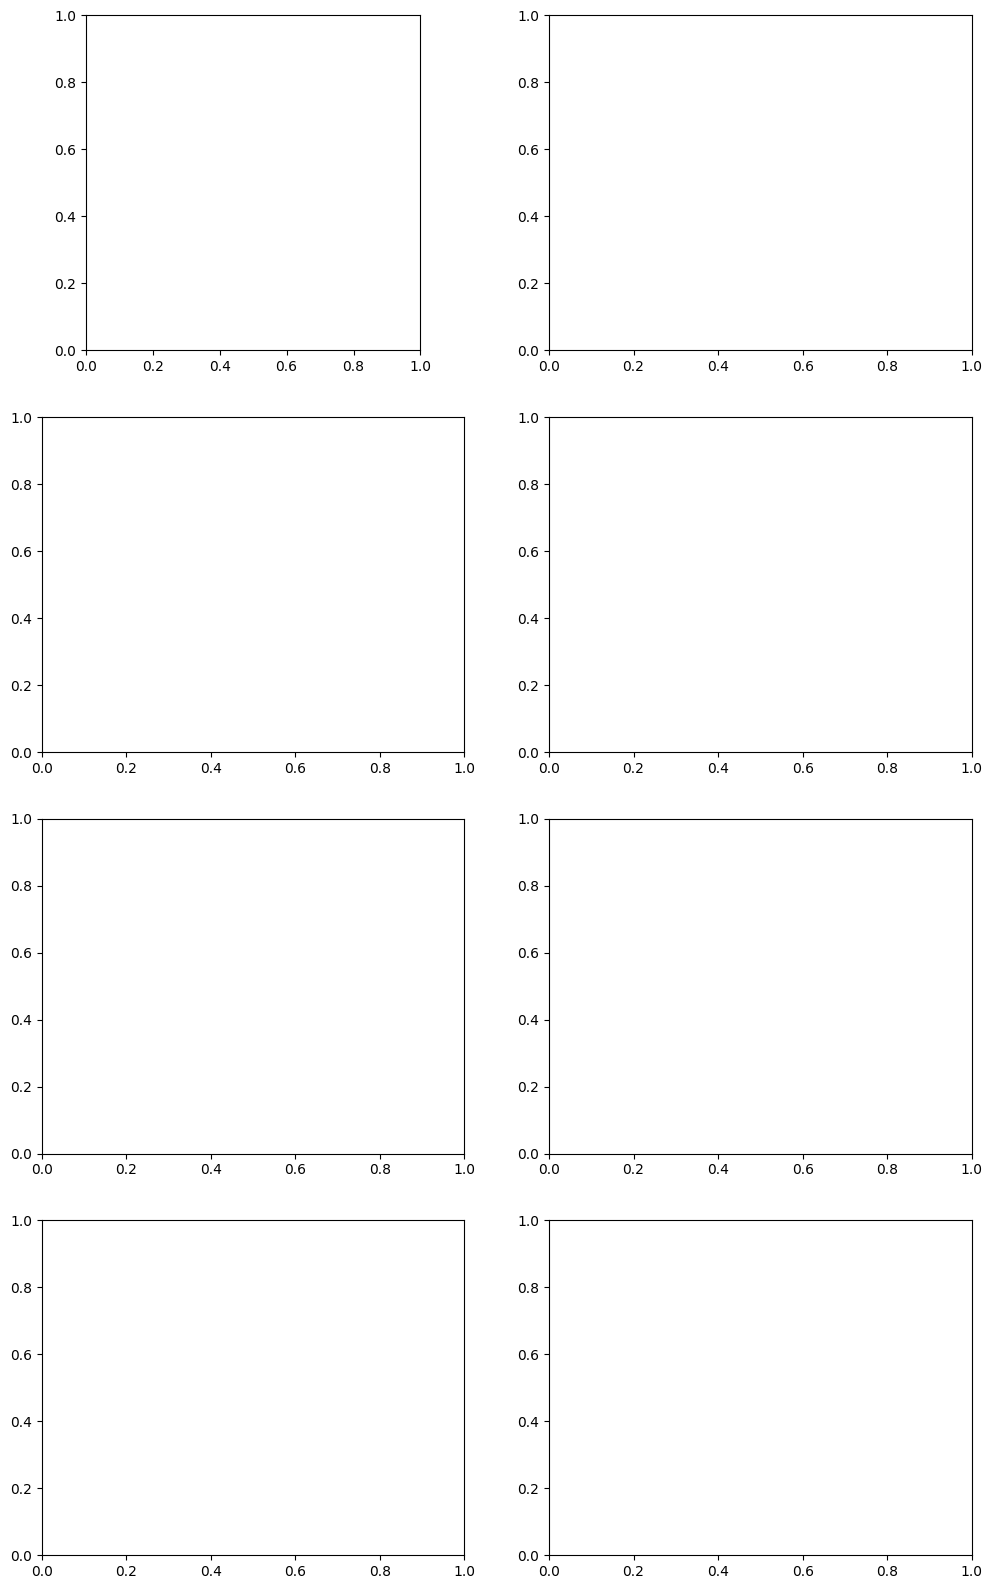

In [34]:
# Define the desired new size
new_size = (256, 256)

# Define a list of resampling methods
resampling_methods = [
    Image.NEAREST,
    Image.BOX,
    Image.BILINEAR,
    Image.HAMMING,
    Image.BICUBIC,
    Image.LANCZOS,
]

# Create a figure to display the images
fig, axes = plt.subplots(len(resampling_methods) // 2 + 1, 2, figsize=(12, 5 * (len(resampling_methods) // 2 + 1)))

# Plot the original image
axes[0, 0].imshow(y_original)
axes[0, 0].axis('off')
axes[0, 0].set_title('Original')

# Resize each channel of the image using each resampling method
for i, method in enumerate(resampling_methods):
    resized_channels = []
    for channel in range(y_original.shape[-1]):
        channel_im = Image.fromarray(y_original[..., channel])
        resized_channel_im = channel_im.resize(new_size, resample=method)
        resized_channels.append(resized_channel_im)
    resized_im = Image.merge('RGB', resized_channels)
    row = i // 2 + 1
    col = i % 2
    axes[row, col].imshow(resized_im)
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Method: {method}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In [56]:
# Create a list to store the SSIM percentages
ssim_percentages = []

# Calculate the SSIM between the original image and each resized image
for method in resampling_methods:
    # Resize the image
    resized_im = im_1_gray.resize(new_size, getattr(Image, method))
    # Convert the resized image to a NumPy array
    resized_im_array = np.array(resized_im.resize(im_1.size))
    # Compute the SSIM
    ssim_score = ssim(im_1_array, resized_im_array)
    # Convert the SSIM score to a percentage and append to the list
    ssim_percentage = ssim_score * 100
    ssim_percentages.append(ssim_percentage)

# Print the SSIM percentages for each method
for method, percentage in zip(resampling_methods, ssim_percentages):
    print(f"Similarity % between original and each method {method}:{percentage}%")

Similarity % between original and each method NEAREST:     99.75872051185236%
Similarity % between original and each method BOX:     99.80236268250937%
Similarity % between original and each method BILINEAR:     99.79338668743122%
Similarity % between original and each method HAMMING:     99.81211962870725%
Similarity % between original and each method BICUBIC:     99.80870089473136%
Similarity % between original and each method LANCZOS:     99.81234149500841%


In [67]:
# Create a list to store the resized images
resized_images = []

# Create a list to store the unique values and their counts of each image
unique_values = []
count_values = []

# Resize the original image
resized_im_1 = im_1.resize(new_size, Image.NEAREST)
resized_images.append(("Original", resized_im_1))

# Resize the image using each resampling method
for method in resampling_methods:
    method_str = str(method)
    resized_im = im_1.resize(new_size, method)
    resized_images.append((method_str, resized_im))

# Sort the resized images based on the resampling method in ascending order
resized_images.sort(key=lambda x: x[0])

# Compute unique values and their counts for each resized image
for _, resized_im in resized_images:
    flat_array = np.array(resized_im).flatten()
    unique, counts = np.unique(flat_array, return_counts=True)
    unique_values.append(unique)
    count_values.append(counts)

# Print the unique values and their counts from each image in ascending order
print("Unique Values and Counts (Ascending Order):")
for i, (method, _) in enumerate(resized_images):
    print(f"Method {method}:")
    for value, count in zip(unique_values[i], count_values[i]):
        print(f"Value: {value}, Count: {count}")

Unique Values and Counts (Ascending Order):
Method 0:
Value: 0, Count: 3
Value: 2, Count: 10043
Value: 3, Count: 2822
Value: 4, Count: 261
Value: 5, Count: 2821
Value: 6, Count: 86
Value: 7, Count: 48259
Value: 8, Count: 1241
Method 1:
Value: 1, Count: 23
Value: 2, Count: 9408
Value: 3, Count: 2762
Value: 4, Count: 986
Value: 5, Count: 2968
Value: 6, Count: 627
Value: 7, Count: 47851
Value: 8, Count: 894
Value: 9, Count: 17
Method 2:
Value: 2, Count: 9189
Value: 3, Count: 2827
Value: 4, Count: 1186
Value: 5, Count: 2987
Value: 6, Count: 743
Value: 7, Count: 47776
Value: 8, Count: 828
Method 3:
Value: 1, Count: 2
Value: 2, Count: 9353
Value: 3, Count: 2813
Value: 4, Count: 1013
Value: 5, Count: 2980
Value: 6, Count: 655
Value: 7, Count: 47826
Value: 8, Count: 894
Method 4:
Value: 2, Count: 9238
Value: 3, Count: 2860
Value: 4, Count: 992
Value: 5, Count: 2981
Value: 6, Count: 526
Value: 7, Count: 47973
Value: 8, Count: 966
Method 5:
Value: 1, Count: 1
Value: 2, Count: 9398
Value: 3, Coun

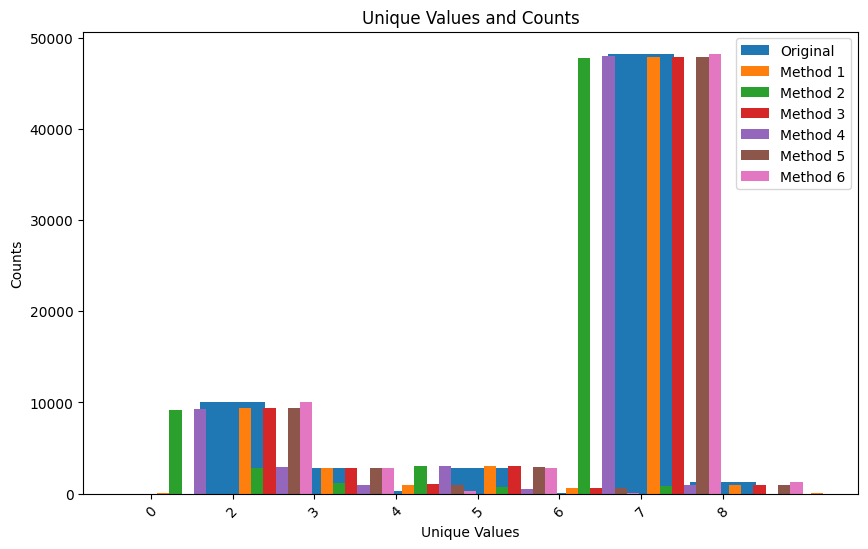

In [71]:
# Define the labels and counts for each method
labels = []
counts = []

# Add the labels and counts for each method
for i, (method, _) in enumerate(resized_images):
    method_labels = [str(value) for value in unique_values[i]]
    method_counts = count_values[i]
    labels.append(method_labels)
    counts.append(method_counts)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(np.arange(len(labels[0])), counts[0], label="Original")
width = 0.15
for i in range(len(resized_images) - 1):
    ax.bar(np.arange(len(labels[i+1])) + (i+1) * width, counts[i+1], width=width, label=f"Method {i+1}")

# Set the x-axis tick labels
ax.set_xticks(np.arange(len(labels[0])))
ax.set_xticklabels(labels[0])

# Set the plot title and labels
ax.set_title("Unique Values and Counts")
ax.set_xlabel("Unique Values")
ax.set_ylabel("Counts")

# Add a legend
ax.legend()

# Rotate x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [174]:
### TEST ####

In [137]:
lbcolor_1.shape

(1000, 1000, 3)

In [144]:
from skimage.transform import resize

# Define the desired new size
new_size = (256, 256)

# Apply the Lanczos resampling method (by default) to lbcolor_1
lbcolorres_1 = resize(lbcolor_1, new_size, mode='reflect', anti_aliasing=True) #Lanczos resampling method by default when                                                                                       anti_aliasing=True
# Get the shape of lbcolorres_1
shape = lbcolorres_1.shape
print("Shape:", shape)

Shape: (256, 256, 3)


In [145]:
from tensorflow.keras.layers import Dropout, BatchNormalization, Conv2D, MaxPooling2D, UpSampling2D,Concatenate,Input
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam



class UNet:
    def __init__(self, input_shape=(256, 256, 3), num_classes=8):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.model = self.build_model()

    def encoder(self, inputs):
        conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
        conv1 = BatchNormalization()(conv1)
        conv1 = Dropout(0.1)(conv1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

        conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
        conv2 = BatchNormalization()(conv2)
        conv2 = Dropout(0.1)(conv2)
        pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

        return conv1, conv2, pool2

    def decoder(self, conv1, conv2, encoded):
        up1 = UpSampling2D(size=(2, 2))(encoded)
        merge1 = Concatenate(axis=3)([conv2, up1])
        conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge1)
        conv3 = BatchNormalization()(conv3)
        conv3 = Dropout(0.1)(conv3)

        up2 = UpSampling2D(size=(2, 2))(conv3)
        merge2 = Concatenate(axis=3)([conv1, up2])
        conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge2)
        conv4 = BatchNormalization()(conv4)
        conv4 = Dropout(0.1)(conv4)

        return conv4

    def build_model(self):
        inputs = Input(self.input_shape)
        conv1, conv2, encoded = self.encoder(inputs)
        decoded = self.decoder(conv1, conv2, encoded)
        outputs = Conv2D(self.num_classes, (1, 1), activation='softmax')(decoded)
        return Model(inputs=inputs, outputs=outputs)

    def compile(self, optimizer='adam'):
        self.model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    def train(self, x, y, epochs=1, batch_size=32, validation_split=0.1):
        self.model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
        lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001, verbose=1)
        self.model.fit(x, y, epochs=epochs, batch_size=batch_size,  callbacks=[lr_reducer])
        # validation_split=validation_split

    def predict(self, x):
        return self.model.predict(x)

In [146]:
y = lbcolorres_1

In [153]:
X_raw = X.copy()
new_size = (256, 256)
X = tf.image.resize(X, new_size)

2023-05-22 21:49:21.651905: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-22 21:49:21.654048: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-22 21:49:21.654092: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-05-22 21:49:21.654120: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-05-22 21:49:21.654144: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [158]:
X.shape

TensorShape([256, 256, 3])

In [159]:
y.shape

(256, 256, 3)

In [164]:
X_train = np.array([X])
Y_train = np.array([y])

In [165]:
X_train.shape

(1, 256, 256, 3)

In [166]:
Y_train.shape

(1, 256, 256, 3)

In [173]:
# Create and compile the model
unet = UNet(input_shape=(256, 256, 3), num_classes=3)
unet.compile(optimizer='adam')
# Train the model
lr_reducer = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=0.00001, verbose=1)
unet.model.fit(X_train, Y_train, epochs=50, batch_size=1, callbacks=[lr_reducer])

Epoch 1/50
1/1 [==============================] - 1s 654ms/step - loss: 0.1127 - accuracy: 0.3771 - lr: 0.0010
Epoch 2/50
1/1 [==============================] - 0s 287ms/step - loss: 0.1716 - accuracy: 0.1544 - lr: 0.0010
Epoch 3/50
1/1 [==============================] - 0s 291ms/step - loss: 0.1037 - accuracy: 0.2311 - lr: 0.0010
Epoch 4/50
1/1 [==============================] - 0s 298ms/step - loss: 0.0903 - accuracy: 0.3959 - lr: 0.0010
Epoch 5/50
1/1 [==============================] - 0s 288ms/step - loss: 0.0902 - accuracy: 0.3752 - lr: 0.0010
Epoch 6/50
1/1 [==============================] - 0s 295ms/step - loss: 0.0890 - accuracy: 0.4126 - lr: 0.0010
Epoch 7/50
1/1 [==============================] - 0s 287ms/step - loss: 0.0857 - accuracy: 0.4124 - lr: 0.0010
Epoch 8/50
1/1 [==============================] - 0s 304ms/step - loss: 0.0842 - accuracy: 0.3900 - lr: 0.0010
Epoch 9/50
1/1 [==============================] - 0s 291ms/step - loss: 0.0837 - accuracy: 0.3587 - lr: 0.0010
E